##  Setup and Data Loading
	•	Import necessary libraries.
	•	Load the model and NetworkTrace.
	•	Convert traces to DataFrames.

In [1]:
# Import necessary libraries.
from traceable_model import TraceableModel
from sample_models import IrisNN
from trace_nn import NetworkTrace
from model_config import config_iris
import subprocess
import pandas as pd
import torch
import pickle

In [2]:
# Run the main process in main.py to execute the training loop and save the model's learnable parameters
subprocess.run(["python", "main.py"])

Epoch [1/20], Loss: 1.0927
Epoch [2/20], Loss: 1.1026
Epoch [3/20], Loss: 1.0770
Epoch [4/20], Loss: 1.0964
Epoch [5/20], Loss: 1.0605
Epoch [6/20], Loss: 1.0926
Epoch [7/20], Loss: 1.0988
Epoch [8/20], Loss: 1.0689
Epoch [9/20], Loss: 1.0998
Epoch [10/20], Loss: 1.0763
Epoch [11/20], Loss: 1.0630
Epoch [12/20], Loss: 1.0590
Epoch [13/20], Loss: 1.0761
Epoch [14/20], Loss: 1.0477
Epoch [15/20], Loss: 1.0587
Epoch [16/20], Loss: 1.0635
Epoch [17/20], Loss: 1.0445
Epoch [18/20], Loss: 1.0417
Epoch [19/20], Loss: 1.0136
Epoch [20/20], Loss: 1.0168


CompletedProcess(args=['python', 'main.py'], returncode=0)

In [3]:
#Load the model, configuration variables, and NetworkTrace.

input_size = config_iris['input_size']
hidden_size = config_iris['hidden_size']
output_size = config_iris['output_size']
num_epochs = config_iris['num_epochs']
batch_size = config_iris['batch_size']
# Initialize the base model
base_model = IrisNN() 

# Initialize the network trace
network_trace = NetworkTrace()

# Define layers to trace using config_iris
layers_to_trace = list(config_iris['layer_names'].values())

# Wrap the base model with TraceableModel
model = TraceableModel(base_model, network_trace, layers_to_trace=layers_to_trace)

# Load the trained model's state
model.load_state_dict(torch.load('outputs/trained_model_full.pth'))


# Load the saved network trace from the pickle file (weights and biases from training)
with open('outputs/network_trace.pkl', 'rb') as f:
    network_trace = pickle.load(f)

    # Assign the loaded network trace back to the model
model.network_trace = network_trace

In [4]:
for epoch, neurons in network_trace.trace.items():
    print(f"Epoch: {epoch}")
    for global_neuron_id, neuron_trace in neurons.items():
        print(f"  Global Neuron ID: {global_neuron_id}")
        print(f"    Layer: {neuron_trace.layer_name}")
        print(f"    Activations: {neuron_trace.get_activation_statistics()}")
        print(f"    Weight: {neuron_trace.weight}")
        print(f"    Bias: {neuron_trace.bias}")
        print(f"    Activation Sum: {neuron_trace.activation_sum}")
        print(f"    Activation Squared Sum: {neuron_trace.activation_squared_sum}")
        print(f"    Activation Max: {neuron_trace.activation_max}")
        print(f"    Activation Min: {neuron_trace.activation_min}")
        print(f"    Count: {neuron_trace.count}")

Epoch: 0
  Global Neuron ID: 0
    Layer: L_input
    Activations: {'mean': 0, 'std_dev': 0, 'max': None, 'min': None, 'count': 0}
    Weight: tensor([-0.3939, -0.2618, -0.0537,  0.4772])
    Bias: -0.12475196272134781
    Activation Sum: 0.0
    Activation Squared Sum: 0.0
    Activation Max: -inf
    Activation Min: inf
    Count: 0
  Global Neuron ID: 1
    Layer: L_input
    Activations: {'mean': 0, 'std_dev': 0, 'max': None, 'min': None, 'count': 0}
    Weight: tensor([ 0.2424,  0.3554, -0.1943,  0.3986])
    Bias: -0.4048480689525604
    Activation Sum: 0.0
    Activation Squared Sum: 0.0
    Activation Max: -inf
    Activation Min: inf
    Count: 0
  Global Neuron ID: 2
    Layer: L_input
    Activations: {'mean': 0, 'std_dev': 0, 'max': None, 'min': None, 'count': 0}
    Weight: tensor([-0.3347, -0.3744,  0.4583,  0.0327])
    Bias: 0.3370407521724701
    Activation Sum: 0.0
    Activation Squared Sum: 0.0
    Activation Max: -inf
    Activation Min: inf
    Count: 0
  Global N

In [5]:
# Convert network_trace to a DataFrame using the class method
network_df = network_trace.neurons_to_dataframe()

# Display the DataFrame
print("DataFrame columns:")
print(network_df.columns)
print("First few rows of the DataFrame:")
print(network_df.head())

# Display dataframe
network_df

DataFrame columns:
Index(['global_neuron_id', 'epoch', 'layer', 'mean_activation',
       'std_dev_activation', 'max_activation', 'min_activation', 'count',
       'bias'],
      dtype='object')
First few rows of the DataFrame:
   global_neuron_id  epoch    layer  mean_activation  std_dev_activation  \
0                 0      0  L_input                0                   0   
1                 1      0  L_input                0                   0   
2                 2      0  L_input                0                   0   
3                 3      0  L_input                0                   0   
4                 4      0  L_input                0                   0   

  max_activation min_activation  count      bias  
0           None           None      0 -0.124752  
1           None           None      0 -0.404848  
2           None           None      0  0.337041  
3           None           None      0  0.063905  
4           None           None      0  0.369619  


,global_neuron_id,epoch,layer,mean_activation,std_dev_activation,max_activation,min_activation,count,bias
0,0,0,L_input,0,0,None,None,0,-0.124752
1,1,0,L_input,0,0,None,None,0,-0.404848
2,2,0,L_input,0,0,None,None,0,0.337041
3,3,0,L_input,0,0,None,None,0,0.063905
4,4,0,L_input,0,0,None,None,0,0.369619
...,...,...,...,...,...,...,...,...,...
455,18,19,L_hidden_1,0,0,None,None,0,-0.078742
456,19,19,L_hidden_1,0,0,None,None,0,0.031409
457,20,19,L_output,0,0,None,None,0,-0.200434
458,21,19,L_output,0,0,None,None,0,-0.026275


## Processing Weights and Building Network Graph:
•	Use connections_df to reconstruct the network.
•	Visualize and analyze connection strengths.

In [6]:
# Convert connections to DataFrame
connections_df = network_trace.connections_to_dataframe()
print("Connections DataFrame:")
print(connections_df)

Connections DataFrame:
      epoch source_layer  source_neuron target_layer  target_neuron    weight
0         0      L_input              0   L_hidden_1             10  0.114223
1         0      L_input              1   L_hidden_1             10 -0.082598
2         0      L_input              2   L_hidden_1             10  0.290721
3         0      L_input              3   L_hidden_1             10 -0.049175
4         0      L_input              4   L_hidden_1             10 -0.043226
...     ...          ...            ...          ...            ...       ...
2595     19   L_hidden_1             15     L_output             22 -0.288928
2596     19   L_hidden_1             16     L_output             22  0.307567
2597     19   L_hidden_1             17     L_output             22  0.134603
2598     19   L_hidden_1             18     L_output             22  0.257440
2599     19   L_hidden_1             19     L_output             22 -0.251484

[2600 rows x 6 columns]


In [7]:
# Reconstruct the Network Graph
import networkx as nx

G = nx.DiGraph()

for _, row in connections_df.iterrows():
    source = f"{row['source_layer']}_{row['source_neuron']}"
    target = f"{row['target_layer']}_{row['target_neuron']}"
    weight = row['weight']
    G.add_edge(source, target, weight=weight)

In [8]:
# After fixing connections_to_dataframe
connections_df = network_trace.connections_to_dataframe()
print("Connections DataFrame:")
print(connections_df.head())
print("Columns:", connections_df.columns)

Connections DataFrame:
   epoch source_layer  source_neuron target_layer  target_neuron    weight
0      0      L_input              0   L_hidden_1             10  0.114223
1      0      L_input              1   L_hidden_1             10 -0.082598
2      0      L_input              2   L_hidden_1             10  0.290721
3      0      L_input              3   L_hidden_1             10 -0.049175
4      0      L_input              4   L_hidden_1             10 -0.043226
Columns: Index(['epoch', 'source_layer', 'source_neuron', 'target_layer',
       'target_neuron', 'weight'],
      dtype='object')


In [29]:
import networkx as nx
import plotly.graph_objects as go
import pandas as pd

# Assuming connections_df is your DataFrame
G = nx.DiGraph()

for _, row in connections_df.iterrows():
    source = f"{row['source_layer']}_{row['source_neuron']}"
    target = f"{row['target_layer']}_{row['target_neuron']}"
    weight = row['weight']
    G.add_edge(source, target, weight=weight)

# Assign positions to nodes in 3D space
pos = {}
layer_positions = {'L_input': 0, 'L_hidden_1': 1, 'L_hidden_2': 2, 'L_output': 3}
for node in G.nodes():
    layer, neuron = node.rsplit('_', 1)
    x = int(neuron)
    y = layer_positions.get(layer, 0)
    z = 0  # You can use activation values or other metrics here
    pos[node] = (x, y, z)

# Extract edge coordinates
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

# Extract node coordinates
node_x = []
node_y = []
node_z = []
for node in G.nodes():
    x, y, z = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)

# Create the Plotly figure
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(
        size=5,
        color='blue'),
    text=list(G.nodes()),
    hoverinfo='text')

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='3D Neural Network Graph',
                    showlegend=False,
                    scene=dict(
                        xaxis_title='Neuron Index',
                        yaxis_title='Layer',
                        zaxis_title='Activation Value'),
                    margin=dict(l=0, r=0, b=0, t=50)))

fig.show()

In [36]:
import pandas as pd
import plotly.graph_objects as go

# Your connections_df DataFrame
# ... (Use your actual DataFrame here)

# Filter for the epoch you want to visualize
epoch_to_visualize = 0
df = connections_df[connections_df['epoch'] == epoch_to_visualize]

# Create unique node labels
df['source_node'] = df['source_layer'] + '_' + df['source_neuron'].astype(str)
df['target_node'] = df['target_layer'] + '_' + df['target_neuron'].astype(str)

# Combine nodes and sort them
nodes = list(set(df['source_node'].unique()).union(set(df['target_node'].unique())))

def sort_key(node_label):
    layer, neuron = node_label.rsplit('_', 1)
    neuron = int(neuron)
    layer_order = {'L_input': 0, 'L_hidden_1': 1, 'L_hidden_2': 2, 'L_output': 3}
    return (layer_order.get(layer, 99), neuron)

nodes_sorted = sorted(nodes, key=sort_key)
node_indices = {node: idx for idx, node in enumerate(nodes_sorted)}

# Update indices in df
df['source_idx'] = df['source_node'].map(node_indices)
df['target_idx'] = df['target_node'].map(node_indices)

# Prepare source, target, and weight lists
source_indices = df['source_idx'].tolist()
target_indices = df['target_idx'].tolist()
weights = df['weight'].abs().tolist()  # Use absolute values for the flows

# Assign colors to layers
layer_colors = {
    'L_input': 'lightblue',
    'L_hidden_1': 'lightgreen',
    'L_hidden_2': 'orange',
    'L_output': 'red'
}

# Map node colors based on their layer
node_colors = [layer_colors.get(node.split('_')[0], 'gray') for node in nodes_sorted]

# Normalize weights for opacity
max_weight = max(weights)
normalized_weights = [0.2 + 0.8 * (w / max_weight) for w in weights]

# Link colors with opacity
link_colors = [
    f'rgba(0,0,255,{opacity})' if w >= 0 else f'rgba(255,0,0,{opacity})'
    for w, opacity in zip(df['weight'], normalized_weights)
]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',  # Try 'perpendicular', 'freeform', 'fixed', or 'snap'
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes_sorted,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=weights,
        color=link_colors,
        customdata=df['weight'].tolist(),
        hovertemplate='Source: %{source.label}<br />Target: %{target.label}<br />Weight: %{customdata}<extra></extra>'
    )
)])

fig.update_layout(title_text='Neural Network Sankey Diagram - Epoch {}'.format(epoch_to_visualize), font_size=10)
fig.show()

In [38]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Assuming connections_df is your DataFrame
# Build the graph with edge attributes
G = nx.DiGraph()

# Populate the graph with nodes and edges
for _, row in connections_df.iterrows():
    source = f"{row['source_layer']}_n_{row['source_neuron']}"
    target = f"{row['target_layer']}_n_{row['target_neuron']}"
    weight = row['weight']
    G.add_edge(source, target, weight=weight)

# Generate 3D positions for nodes
pos = nx.spring_layout(G, k=0.8, seed=42, dim=3)  # Set 'dim=3' for 3D positions

# Set up 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Extract node positions
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]
z_nodes = [pos[node][2] for node in G.nodes()]

# Get edge weights and normalize for edge width
weights = nx.get_edge_attributes(G, 'weight')
edge_weights = list(weights.values())
abs_edge_weights = [abs(w) for w in edge_weights]

# Normalize edge widths for visualization
max_width = 5
min_width = 0.5
edge_widths = [min_width + (max_width - min_width) * (abs(w) / max(abs_edge_weights)) for w in abs_edge_weights]

# Edge colors based on weight sign
edge_colors = ['red' if w > 0 else 'blue' for w in edge_weights]

# Draw nodes
ax.scatter(x_nodes, y_nodes, z_nodes, s=100, c='lightgray', edgecolors='k', depthshade=True)

# Draw edges
for i, (edge, weight) in enumerate(zip(G.edges(), edge_weights)):
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    z = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x, y, z, c=edge_colors[i], linewidth=edge_widths[i])

# Add node labels
for node in G.nodes():
    x, y, z = pos[node]
    ax.text(x, y, z, node, fontsize=8)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Positive Weight'),
    Line2D([0], [0], color='blue', lw=2, label='Negative Weight'),
    Patch(facecolor='lightgray', edgecolor='k', label='Neuron')
]
ax.legend(handles=legend_elements, loc='best')

ax.set_title("3D Neural Network Graph with Edge Widths Representing Weight Magnitude")
ax.axis('off')  # Hide axes

# Optionally, adjust the viewing angle
ax.view_init(elev=20, azim=30)  # Adjust elevation and azimuthal angles

plt.show()

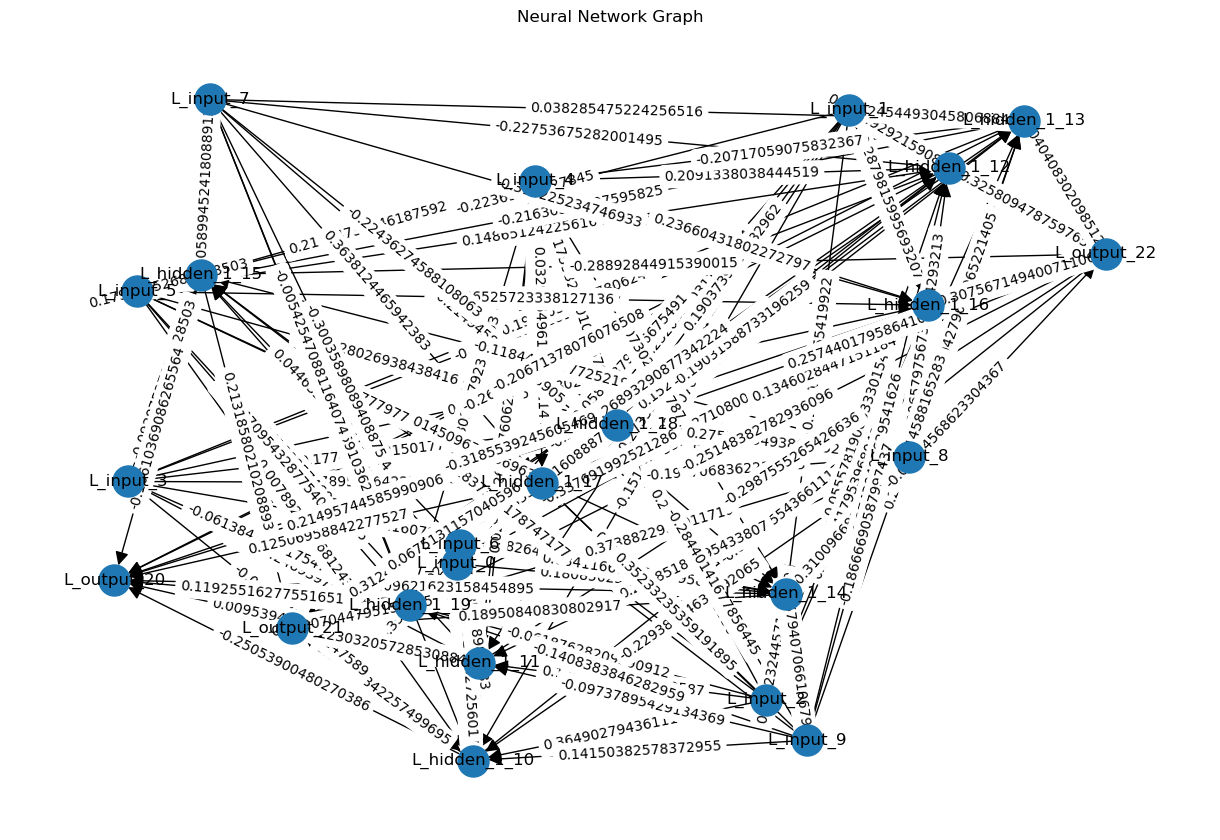

In [9]:
# Visualize the Network
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15)  # Adjust k for spacing
edge_weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=500, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
plt.title("Neural Network Graph")
plt.show()

In [10]:
# Filter connections with high absolute weight values
threshold = 0.3  # Adjust threshold as needed
strong_connections = connections_df[connections_df['weight'].abs() > threshold]
print("Strong Connections:")
print(strong_connections)

Strong Connections:
      epoch source_layer  source_neuron target_layer  target_neuron    weight
20        0      L_input              0   L_hidden_1             12 -0.309345
39        0      L_input              9   L_hidden_1             13  0.307697
65        0      L_input              5   L_hidden_1             16  0.305522
90        0      L_input              0   L_hidden_1             19  0.302824
122       0   L_hidden_1             12     L_output             22  0.303042
...     ...          ...            ...          ...            ...       ...
2576     19   L_hidden_1             16     L_output             20 -0.318554
2586     19   L_hidden_1             16     L_output             21 -0.337692
2587     19   L_hidden_1             17     L_output             21  0.312439
2592     19   L_hidden_1             12     L_output             22  0.325809
2596     19   L_hidden_1             16     L_output             22  0.307567

[152 rows x 6 columns]


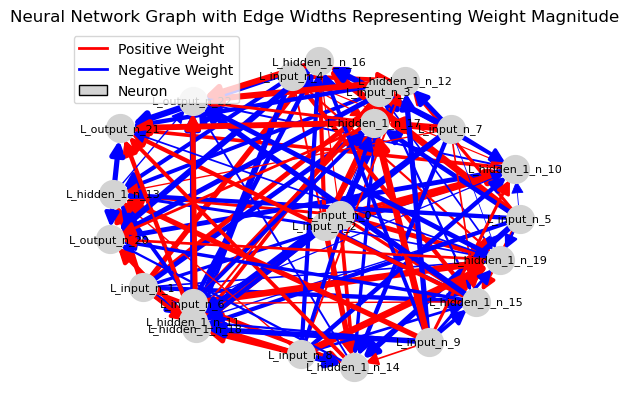

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Build the graph with edge attributes
G = nx.DiGraph()

# Populate the graph with nodes and edges
for _, row in connections_df.iterrows():
    source = f"{row['source_layer']}_n_{row['source_neuron']}"
    target = f"{row['target_layer']}_n_{row['target_neuron']}"
    weight = row['weight']
    G.add_edge(source, target, weight=weight)

# Increase 'k' for more node separation and spread out the graph
pos = nx.spring_layout(G, k=0.8, seed=42)  # Adjusted 'k' for more separation

# Get edge weights and normalize for edge width
weights = nx.get_edge_attributes(G, 'weight')
edge_weights = list(weights.values())
abs_edge_weights = [abs(w) for w in edge_weights]

# Normalize edge widths for visualization
max_width = 5
min_width = 0.5
edge_widths = [min_width + (max_width - min_width) * (abs(w) / max(abs_edge_weights)) for w in abs_edge_weights]

# Normalize edge colors based on weight magnitude
edge_colors = ['red' if w > 0 else 'blue' for w in edge_weights]

# Draw nodes with smaller size
nx.draw_networkx_nodes(G, pos, node_size=400, node_color='lightgray')  # Reduced node size

# Draw edges with varying widths and colors
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, arrowsize=20)

# Draw node labels with smaller font size
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=8)  # Smaller font size

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Positive Weight'),
    Line2D([0], [0], color='blue', lw=2, label='Negative Weight'),
    Patch(facecolor='lightgray', edgecolor='k', label='Neuron')
]
plt.legend(handles=legend_elements, loc='best')

plt.title("Neural Network Graph with Edge Widths Representing Weight Magnitude")
plt.axis('off')  # Hide axis
plt.show()

### Associating Predictions with Model States

In [16]:
from model_config import config_iris

# Start inference trace
model.start_inference_trace(epoch='inference')

# Example test data
X_test = config_iris['data']['X_test']
predictions = model.predict(X_test, batch_size=config_iris['inference_batch_size'], return_probabilities=True)

# End inference trace
model.end_inference_trace()

# Access predictions
predictions = network_trace.predictions['inference']  # NumPy array of predictions

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Access true labels
y_test = config_iris['data']['y_test'].cpu().numpy().flatten()
true_labels = y_test.astype(int)

# Ensure that predicted_classes and true_labels have the same shape
if predicted_classes.shape != true_labels.shape:
    raise ValueError(f"Shape mismatch: predicted_classes shape {predicted_classes.shape}, true_labels shape {true_labels.shape}")

# Determine correctness
correct_predictions = (predicted_classes == true_labels).astype(int)

# Optional: Print or log the results
print(f"Correct Predictions: {correct_predictions.sum()} out of {len(true_labels)}")

Correct Predictions: 22 out of 30


In [14]:
# Uncomment and run to clear inference trace after the session (optional)
# model.network_trace.trace.pop('inference', None)

In [17]:
import pandas as pd

data = []
num_samples = len(predictions)

for i in range(num_samples):
    sample_data = {
        'Sample_Index': i,
        'Prediction': predicted_classes[i],
        'True_Label': true_labels[i],
        'Correct': correct_predictions[i]
    }
    for layer_name in network_trace.layer_order:
        # Get the number of neurons in the layer
        num_neurons = len([key for key in network_trace.global_neuron_id_map if key[0] == layer_name])
        for neuron_index in range(num_neurons):
            global_neuron_id = network_trace.global_neuron_id_map.get((layer_name, neuron_index))
            if global_neuron_id is not None:
                neuron_trace = network_trace.trace['inference'].get(global_neuron_id)
                if neuron_trace is not None and i < len(neuron_trace.activations):
                    activation_value = neuron_trace.activations[i]
                    neuron_name = f"{layer_name}_neuron_{neuron_index}"
                    sample_data[neuron_name] = activation_value
    data.append(sample_data)

# Create the DataFrame
activation_df = pd.DataFrame(data)

In [22]:
activation_df

,Sample_Index,Prediction,True_Label,Correct,L_input_neuron_0,L_input_neuron_1,L_input_neuron_2,L_input_neuron_3,L_input_neuron_4,L_input_neuron_5,...,L_hidden_1_neuron_3,L_hidden_1_neuron_4,L_hidden_1_neuron_5,L_hidden_1_neuron_6,L_hidden_1_neuron_7,L_hidden_1_neuron_8,L_hidden_1_neuron_9,L_output_neuron_0,L_output_neuron_1,L_output_neuron_2
0,0,1,1,1,-0.144346,-0.487757,0.879462,0.382191,0.850557,-0.346909,...,-0.335468,0.493289,-0.015608,0.235530,0.486445,0.065535,0.069534,-0.400752,0.237957,-0.233028
1,1,0,0,1,-0.920067,-0.149104,-1.004183,-0.496461,-0.530231,-0.019893,...,-0.121209,-0.105609,-0.028359,-0.884064,-0.061540,0.247331,0.842984,-0.046739,-0.061901,-0.448383
2,2,2,2,1,-0.439947,0.554902,1.329285,1.526649,1.917785,-0.075954,...,-0.688465,0.647851,-0.117185,1.000370,0.668223,0.344493,-0.002602,-0.698450,0.016718,0.223336
3,3,1,1,1,0.019157,-0.229508,0.790453,0.403821,0.791980,-0.401945,...,-0.298687,0.495250,-0.027434,0.294871,0.412336,0.078320,0.034235,-0.432119,0.198086,-0.212002
4,4,1,1,1,-0.432710,-0.084082,0.691423,0.597457,1.044794,-0.294274,...,-0.372547,0.422917,0.031958,0.320142,0.472224,0.007277,0.045953,-0.431743,0.180208,-0.210898
5,5,1,0,0,-0.402832,-0.553699,-0.549774,-0.688501,-0.399992,-0.492324,...,-0.103579,-0.024754,-0.026956,-0.746208,-0.065945,0.209738,0.719390,-0.069559,-0.056768,-0.426980
6,6,1,1,1,0.192491,-0.465551,0.630385,0.025767,0.494178,-0.624748,...,-0.164494,0.528839,0.013942,0.068121,0.252729,0.085135,0.170598,-0.351684,0.230611,-0.353135
7,7,2,2,1,-0.225336,0.796290,0.559835,0.992387,1.130468,-0.182023,...,-0.259160,0.494555,-0.149961,0.649492,0.246674,0.211815,-0.007690,-0.546109,-0.059149,0.017608
8,8,1,1,1,0.399600,-0.783418,1.418983,0.267514,1.201584,-1.006757,...,-0.353023,0.812095,-0.010954,0.496745,0.627100,0.198295,0.115986,-0.546332,0.324128,-0.165445
9,9,1,1,1,0.146583,-0.650012,0.839489,0.074725,0.682014,-0.676709,...,-0.224877,0.566465,0.002761,0.169789,0.373043,0.080233,0.122164,-0.393843,0.252645,-0.299212


In [24]:
import numpy as np

# Separate data based on predicted classes
num_classes = len(np.unique(predicted_classes))
class_means = {}

# Define the columns that correspond to neuron activations
activation_columns = [col for col in activation_df.columns if 'neuron' in col]

for cls in range(num_classes):
    class_df = activation_df[activation_df['Prediction'] == cls]
    class_means[cls] = class_df[activation_columns].mean()

# Compare the means between all classes
activation_diff = {}
for i in range(num_classes):
    for j in range(i + 1, num_classes):
        diff_key = f"class_{j}_minus_class_{i}"
        activation_diff[diff_key] = class_means[j] - class_means[i]

# Convert activation_diff to DataFrame for easier viewing and sorting
activation_diff_df = pd.DataFrame(activation_diff)

print("Activation differences between predicted classes:")
print(activation_diff_df.sort_values(by=list(activation_diff_df.columns), ascending=False))

Activation differences between predicted classes:
                     class_1_minus_class_0  class_2_minus_class_0  \
L_input_neuron_4                  1.270659               1.793064   
L_input_neuron_2                  1.187363               1.061322   
L_input_neuron_3                  1.167936               2.070573   
L_hidden_1_neuron_6               1.140494               1.737511   
L_hidden_1_neuron_0               0.634042               0.439360   
L_hidden_1_neuron_4               0.578773               0.523812   
L_input_neuron_1                  0.575214               1.703002   
L_hidden_1_neuron_7               0.499464               0.386599   
L_input_neuron_0                  0.291116              -0.221615   
L_output_neuron_2                 0.253649               0.566938   
L_output_neuron_1                 0.227210              -0.065619   
L_hidden_1_neuron_2               0.107425               0.418172   
L_input_neuron_5                  0.062408           

In [19]:
import matplotlib.pyplot as plt
from itertools import combinations

# Get unique predicted classes
unique_classes = activation_df['Prediction'].unique()
print("Unique predicted classes:", unique_classes)

# Create DataFrames for each class
class_dfs = {}
for cls in unique_classes:
    df = activation_df[activation_df['Prediction'] == cls]
    class_dfs[cls] = df
    print(f"Class {cls} DataFrame shape: {df.shape}")

# Calculate mean activations for each class
activation_columns = [col for col in activation_df.columns if 'neuron' in col]
class_means = {}
for cls, df in class_dfs.items():
    class_means[cls] = df[activation_columns].mean()

# Compute activation differences between class pairs
activation_diffs = {}
for cls1, cls2 in combinations(unique_classes, 2):
    diff = class_means[cls1] - class_means[cls2]
    key = f"{cls1}-{cls2}"
    activation_diffs[key] = diff

# Choose a class pair to analyze
pair_key = '0-1'  # Adjust based on your classes
activation_diff = activation_diffs.get(pair_key)

if activation_diff is not None and not activation_diff.empty:
    # Get the top neurons with the largest activation differences
    top_neurons = activation_diff.abs().sort_values(ascending=False).head(10).index
    activation_diff_top = activation_diff[top_neurons]

    plt.figure(figsize=(10, 6))
    activation_diff_top.plot(kind='bar')
    plt.title(f'Activation Difference Between Predicted Classes {pair_key} for Top Neurons')
    plt.ylabel(f'Activation Difference (Class {pair_key.replace("-", " vs ")})')
    plt.show()
else:
    print(f"No data available for class pair {pair_key}.")

Unique predicted classes: [1 0 2]
Class 1 DataFrame shape: (17, 27)
Class 0 DataFrame shape: (8, 27)
Class 2 DataFrame shape: (5, 27)
No data available for class pair 0-1.


In [27]:
# Debug: Print the activation_diff dictionary
print(activation_diff)

# Assuming activation_diff should only contain scalar values, you can filter out non-scalar entries
activation_diff_filtered = {k: v for k, v in activation_diff.items() if np.isscalar(v)}

# Convert the filtered dictionary to a Pandas Series
activation_diff_series = pd.Series(activation_diff_filtered)

# Now you can perform the sorting and selection
top_neurons = activation_diff_series.abs().sort_values(ascending=False).head(10).index

{'class_1_minus_class_0': L_input_neuron_0       0.291116
L_input_neuron_1       0.575214
L_input_neuron_2       1.187363
L_input_neuron_3       1.167936
L_input_neuron_4       1.270659
L_input_neuron_5       0.062408
L_input_neuron_6      -1.385335
L_input_neuron_7      -0.706876
L_input_neuron_8      -1.912182
L_input_neuron_9      -0.086514
L_hidden_1_neuron_0    0.634042
L_hidden_1_neuron_1   -0.134980
L_hidden_1_neuron_2    0.107425
L_hidden_1_neuron_3   -0.192637
L_hidden_1_neuron_4    0.578773
L_hidden_1_neuron_5    0.012105
L_hidden_1_neuron_6    1.140494
L_hidden_1_neuron_7    0.499464
L_hidden_1_neuron_8   -0.131635
L_hidden_1_neuron_9   -0.738213
L_output_neuron_0     -0.383040
L_output_neuron_1      0.227210
L_output_neuron_2      0.253649
dtype: float64, 'class_2_minus_class_0': L_input_neuron_0      -0.221615
L_input_neuron_1       1.703002
L_input_neuron_2       1.061322
L_input_neuron_3       2.070573
L_input_neuron_4       1.793064
L_input_neuron_5       0.621451
L_inp

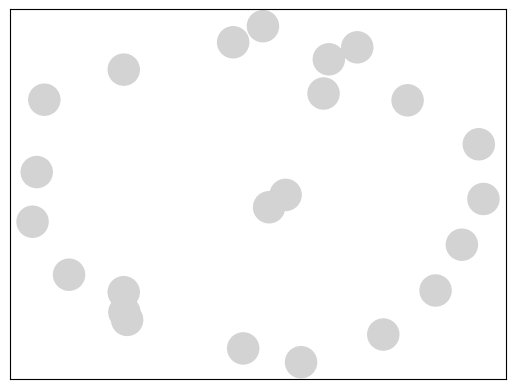

In [28]:
# Let's say we're interested in the activation difference between class 1 and class 0
activation_diff_series = activation_diff['class_1_minus_class_0']

# Get top neurons with the largest activation differences
top_neurons = activation_diff_series.abs().sort_values(ascending=False).head(10).index

# Map neuron names to global neuron IDs
top_global_neuron_ids = []
for neuron_name in top_neurons:
    layer_name, neuron_label = neuron_name.split('_neuron_')
    neuron_index = int(neuron_label)
    global_neuron_id = network_trace.global_neuron_id_map.get((layer_name, neuron_index))
    if global_neuron_id is not None:
        top_global_neuron_ids.append(global_neuron_id)

# In your network visualization, highlight these neurons
highlighted_nodes = set()
for global_neuron_id in top_global_neuron_ids:
    node_name = f"{layer_name}_{global_neuron_id}"  # Adjust if necessary
    highlighted_nodes.add(node_name)

# Modify visualization to highlight these nodes
node_colors = []
for node in G.nodes():
    if node in highlighted_nodes:
        node_colors.append('yellow')  # Highlight color
    else:
        node_colors.append('lightgray')

# Draw nodes with updated colors
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)